 <center> <h1> <b> Pattern Recognition and Machine Learning (EE2802 - AI2000) </b> </h1> </center>

<b> Programming Assignment 01 - KNN : </b> Welcome to the programming assignment (PA) on k-nearest neighbors (KNN) classification. Throughout this PA, you will explore the k-NN algorithm, a versatile and intuitive method for tackling classification and regression challenges. Specifically, this assignment aims to enhance your understanding of the KNN classification algorithm. In this PA, we expect you to implement and experiment with the KNN classifier to understand how variations in 'k' and distance metrics influence classification performance.

<b> Instructions </b>

1. Plagiarism is strictly prohibited.
2. Delayed submissions are not accepted
3. Please DO NOT use any machine learning libraries unless and otherwise specified.

<b> Part(a): Synthetic data generation </b>

1. Consider four bivariate Gaussians with means at (0,0), (0,1), (1,0), and (1,1), each with a diagonal covariance matrix with diagonal elements being 0.1. Sample 90 points from each Gaussian, resulting in a total of 360 points. Allocate 30 points from each Gaussian for training and 60 points for testing. This results in a total of 120 points for training and 240 points for testing.

2. Create a 2-class training set ($[X_{train}, Y_{train}]$) and a test set ($[X_{test}, Y_{test}]$) by labeling the data sampled from Gaussians with means at (0,0) and (1,1) as class 1, and the data sampled from Gaussians with means at (0,1) and (1,0) as class 2. Assign a label of +1 to class1 and -1 to class2.

3. Visualize both train and test sets using the scatter plot on a 2-D plane. Indicate the data points from class 1 with a green color and those from class 2 with a blue color.

<b> Part(b): KNN Classification - </b> The k-Nearest Neighbors (KNN) classifier algorithm is a straightforward yet powerful tool for classification tasks. The KNN classifier takes the test data point, computes distances to all points in the training set, identifies the 'k' nearest neighbors based on these distances, and assigns the test data to the class that the majority of its neighbors belong to.

<b> Programming questions </b>

1. Develop a Python class named 'KNeighbourClassifier' that encapsulates the hyperparameters of a K-Nearest Neighbors (KNN) classifier, such as the number of neighbors (k) and the distance metric. Implement the following methods within this class. $\textit{fit(X_train, y_train):}$ This method should accept training data (X_train) and corresponding labels (y_train) as input. It should store these inputs as internal attributes of the class for later use in prediction. $\textit{predict(X_test):} This method should take test data (X_test) as input and return the predicted labels for the given data points using the KNN algorithm.

2. Instantiate an object of the KNeighbourClassifier class. Train the classifier on the provided training data by calling the fit() method. Use this trained classifier to predict the labels of the test data. Finally, evaluate the classifier's accuracy by comparing the predicted labels with the actual (original) labels of the test data

3. Generate a 2D scatter plot of the test data, assigning green to class 1, blue to class 2, and red to test data points whose predicted labels do not match their true labels.

4. Visualize the decision boundaries of a given classifier by generating a 2D grid and predicting the class labels for each point in the grid using the KNN algorithm. Color-code the grid points based on their predicted class labels to visually represent the decision regions

<b> Part(c): Parameter selection: What is good value for k? - </b> A common approach to finding the optimal value for the hyperparameter 'k' in K-Nearest Neighbors is through cross-validation. In this method, a portion (ρ%) of the training data is set aside as a validation set. The KNN model is then trained on the remaining data and evaluated on the validation set for a range of 'k' values. The optimal 'k' is selected as the value that results in the best performance on the validation set.

<b> Algorithm </b>

1. Perform hold-out cross-validation by setting aside a fraction (ρ of the training set for validation. Note: You may use ρ = 0.3, and repeat the procedure 10 times. The hold-out procedure may be quite unstable.
2. Use a large range of candidate values for k (e.g. k = 1, 3, 5..., 21). Notice odd numbers are considered to avoid ties.
3. Repeat the process for 10 times using a random cross-validation set each time with a ρ = 0.3.
4. Plot the training and validation errors for the different values of k.

<b> Questions </b>

5. How would you now answer the question "what is the best value for k"?
6. How is the value of k affected by ρ (percentage of points held out) and number of repetitions? What does a large number of repetitions provide?
7. Apply the model obtained by cross-validation (i.e., best k) to the test set and check if there is an improvement on the classification error over the result of Part (b).

<b> Part(d): Influence of training data on KNN classifier - </b>

1. Evaluate the performance as the size of the training set
   grows, e.g., n = {200, 400, 1200,...}. How would you choose a good range for k as n changes? What can you say about the stability of the solution? Check by repeating the validation multiple times.

2. Investigate how the distribution of the training data affects the performance of the KNN algorithm. Replace the Gaussian distribution used in part (a) with a Laplacian distribution. Generate both training and testing datasets based on these distributions. Evaluate the KNN classifier's performance on both datasets. Analyze whether the KNN achieves comparable performance with both Gaussian and Laplacian distributed data. Examine the effect of changing the distance metric from $l_{2}$ to $l_{1}$ on the KNN performance for both Gaussian and Laplacian distributed datasets

<b> Part(e): What is the influence of distance measure on decision regions ? - </b>

1. Evaluate the performance of the KNN classifier with different distance measures such as $l_{1}$, $l_{2}$, etc,.
2. Plot the decision regions of the KNN classifier with different distance measures.
3. Report your observations.

<b> Part(f): MNIST Digit classification using KNN classifier: </b> :

1. Use the above written KNN classifier to perform digit claissification using MNIST digit dataset.
2. The MNIST dataset consists of approximately 70,000 images of handwritten digits. Create training, validation, and test datasets from this entire dataset with the respective proportions of 80%, 10%, and 10%. The 28x28 images in the MNIST data set may be flattened to arrive at a 784 dimensional vector.
3. Use the most suitable distance metric and k to maximize the test data performance.
4. Create a confusion matrix to understand the most confused classes (digits).
5. Suggest alternate ways to improve the performance.


In [1]:
#All imports
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import random
import math
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml

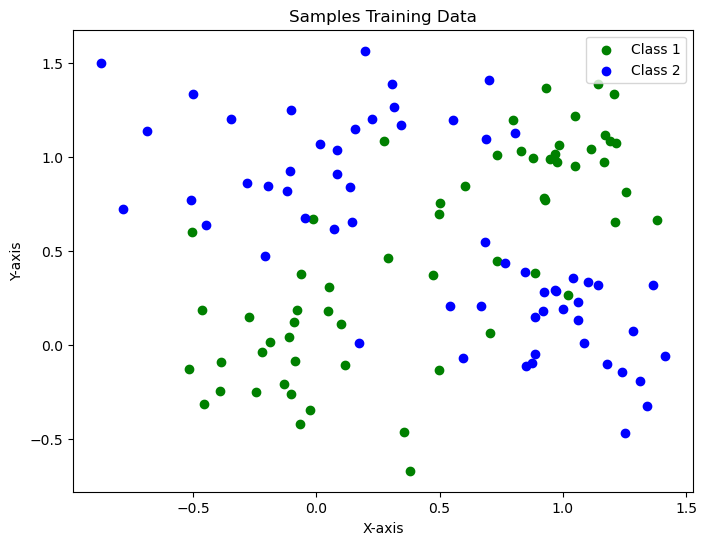

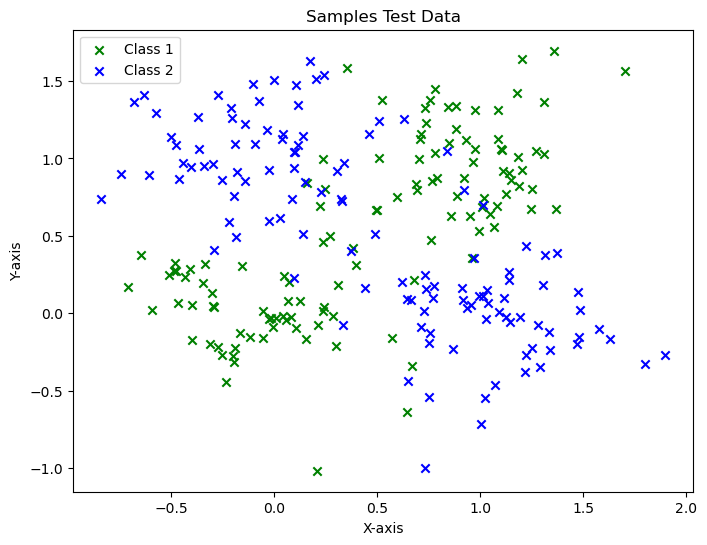

In [ ]:
########################################
#Part(a) #Synthetic data generation
########################################

# Define means and covariances
mean1 = [0, 0]
mean2 = [1, 1]
mean3 = [1, 0]
mean4 = [0, 1]
means = [mean1, mean2, mean3, mean4]
cov = [[0.1, 0], [0, 0.1]]  # covariance matrix

# Sample data points from the bivariate Gaussian distribution
X_train = []
Y_train = []
X_test = []
Y_test = []

# Generating training and testing data
for mean in means:
    train_sample = np.random.multivariate_normal(mean, cov, 30)
    test_sample = np.random.multivariate_normal(mean, cov, 60)

    X_train.extend(train_sample)
    X_test.extend(test_sample)

    if mean[0] == mean[1]:  # Class 1
        Y_train.extend(np.ones(30))
        Y_test.extend(np.ones(60))
    else:  # Class 2
        Y_train.extend(-np.ones(30))
        Y_test.extend(-np.ones(60))

X_train = np.array(X_train)
X_test = np.array(X_test)
Y_train = np.array(Y_train)
Y_test = np.array(Y_test)

# # Print dataset information
# print(len(X_train), len(Y_train), len(X_test), len(Y_test))
# print(X_train[:5])
# print(X_train[0].dtype)
# print(Y_train[:5])

#Visualize the data using plt.scatter() function
plt.figure(figsize=(8, 6))
plt.scatter(X_train[Y_train == 1, 0], X_train[Y_train == 1, 1], label="Class 1", color='green', marker='o')
plt.scatter(X_train[Y_train == -1, 0], X_train[Y_train == -1, 1], label="Class 2", color='blue', marker='o')
plt.title('Samples Training Data')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(X_test[Y_test == 1, 0], X_test[Y_test == 1, 1], label="Class 1", color='green', marker='x')
plt.scatter(X_test[Y_test == -1, 0], X_test[Y_test == -1, 1], label="Class 2", color='blue', marker='x')
plt.title('Samples Test Data')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.show()


In [5]:
X_train = np.array(X_train)
Y_train = np.array(Y_train)
X_test = np.array(X_test)
Y_test = np.array(Y_test)
X_train.shape,Y_train.shape,X_test.shape,Y_test.shape

((120, 2), (120,), (240, 2), (240,))

<Figure size 800x600 with 0 Axes>

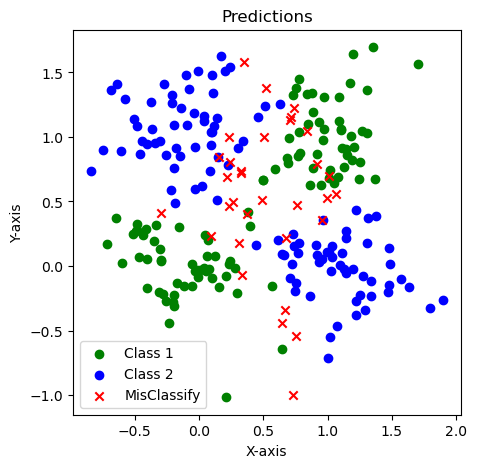

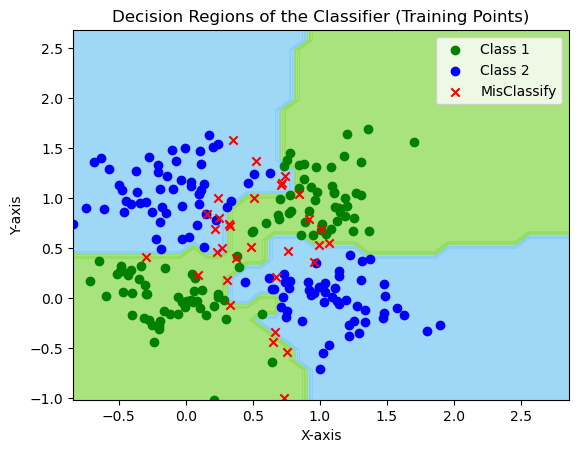

In [ ]:
########################################
#Part(b) #KNN classification
########################################

class KNeighborsClassifier:
    """
    K-Nearest Neighbors Classifier
    This class implements the k-nearest neighbors algorithm for classification.
    """
    def __init__(self, n_neighbors=5, distance_metric="l2"):
        self.n_neighbors = n_neighbors
        self.distance_metric = distance_metric
        self.X_train = None
        self.y_train = None

    def fit(self, X_train, Y_train):
        """
        Fits the k-nearest neighbors classifier from the training data.

        Parameters:
        - X_train: numpy array of shape (n_samples, n_features)
        - Y_train: numpy array of shape (n_samples,)
        """
        self.X_train = X_train
        self.y_train = Y_train

    def predict(self, X_test):
        """
        Predicts the class labels for a set of data samples.

        Parameters:
        - X_test: numpy array of shape (n_samples, n_features)

        Returns:
        - Y_test: List of predicted class labels
        """
        Y_test = []

        for i in range(len(X_test)):
            distances = []

            # computing distances with all training data
            for j in range(len(self.X_train)):
                if self.distance_metric == "l2":
                    distance = np.linalg.norm(X_test[i] - self.X_train[j])
                elif self.distance_metric == "l1":
                    distance = np.sum(np.abs(X_test[i] - self.X_train[j]))
                distances.append((distance, self.y_train[j]))

            distances = sorted(distances, key=lambda x: x[0])

            # getting k nearest neighbour
            k_nearest = [distances[k][1] for k in range(self.n_neighbors)]

            # counting occurance of each class
            class_counts = {}
            for label in k_nearest:
                if label in class_counts:
                    class_counts[label] += 1
                else:
                    class_counts[label] = 1

            max_count = -1
            best_class = None
            for label, count in class_counts.items():
                if count > max_count:
                    max_count = count
                    best_class = label

            Y_test.append(best_class)

        return Y_test

#Write "KNNAccuracy" function
def KNNAccuracy(true,pred):
  #Inputs : Ground truth and predicted labels
  #Outputs : Portion of data points that are correctly classified, i.e., accuracy
  correct = 0
  for i in range(len(true)):
    if true[i] == pred[i]:
      correct += 1
  return (correct/len(true))*100.0


#Create a visual representation of predictions
class1 =[]
class2 =[]
misClassify = []
plt.figure(figsize=(8, 6))
knn = KNeighborsClassifier(3,'l2')
knn.fit(X_train,Y_train)
Y_pred = knn.predict(X_test)
for i in range(len(X_test)):
    if Y_pred[i] != Y_test[i]:
      misClassify.append([X_test[i][0], X_test[i][1]])
    else:
      if(Y_pred[i] ==1):
        class1.append([X_test[i][0], X_test[i][1]])
      else:
        class2.append([X_test[i][0], X_test[i][1]])
class1 = np.array(class1)
class2 = np.array(class2)
misClassify = np.array(misClassify)
plt.figure(figsize=(5,5))
plt.scatter(class1[:, 0], class1[:, 1], label="Class 1", color='green', marker='o')
plt.scatter(class2[:, 0], class2[:, 1], label="Class 2", color='blue', marker='o')
plt.scatter(misClassify[:,0],misClassify[:,1],label="MisClassify",color="red",marker="x")
plt.title('Predictions')
plt.xlabel('X-axis')
plt.legend()
plt.ylabel('Y-axis')
plt.show()

#Generate and visualize the decision regions and overlay the test points
minX = np.min(X_test[:, 0])
maxX = np.max(X_test[:, 0]) +1
minY = np.min(X_test[:, 1])
maxY = np.max(X_test[:, 1]) +1
x1Grid = np.arange(minX, maxX, 0.1)
x2Grid = np.arange(minY, maxY, 0.1)
x1Grid, x2Grid = np.meshgrid(x1Grid, x2Grid)
r1, r2 = x1Grid.flatten(), x2Grid.flatten()
r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))
grid = np.hstack((r1, r2))
ygrid = knn.predict(grid)
ygrid = np.array(ygrid).reshape(x1Grid.shape)
plt.contourf(x1Grid, x2Grid, ygrid, cmap=ListedColormap([ '#87CDF6','#93DC5C']),alpha=0.8)
plt.scatter(class1[:, 0], class1[:, 1], label="Class 1", color='green', marker='o')
plt.scatter(class2[:, 0], class2[:, 1], label="Class 2", color='blue', marker='o')
plt.scatter(misClassify[:,0],misClassify[:,1],label="MisClassify",color="red",marker="x")
plt.title('Decision Regions of the Classifier (Training Points)')
plt.xlabel('X-axis')
plt.legend()
plt.ylabel('Y-axis')
plt.show()

In [16]:
import pandas as pd
train_df = pd.DataFrame(X_train, columns=['x1', 'x2'])
train_df['y'] = Y_train
test_df = pd.DataFrame(X_test, columns=['x1', 'x2'])
test_df['y'] = Y_test
train_df
# train_df.head(-5),test_df.head(-5)

,x1,x2,y
0,-0.024601,-0.344277,1.0
1,-0.503899,0.601434,1.0
2,-0.067648,-0.418852,1.0
3,0.381208,-0.667540,1.0
4,0.706491,0.063738,1.0
...,...,...,...
115,-0.872337,1.497315,-1.0
116,0.196985,1.564888,-1.0
117,0.690151,1.097014,-1.0
118,0.015877,1.071468,-1.0


[20.555555555555554, 18.055555555555554, 13.611111111111112, 11.38888888888889, 10.555555555555555, 11.111111111111109, 11.944444444444443, 15.555555555555559, 17.77777777777778, 14.444444444444443, 12.5]
[0.0, 7.976190476190475, 10.0, 11.071428571428573, 11.904761904761903, 11.547619047619047, 12.023809523809522, 12.023809523809526, 12.5, 12.5, 13.571428571428571]


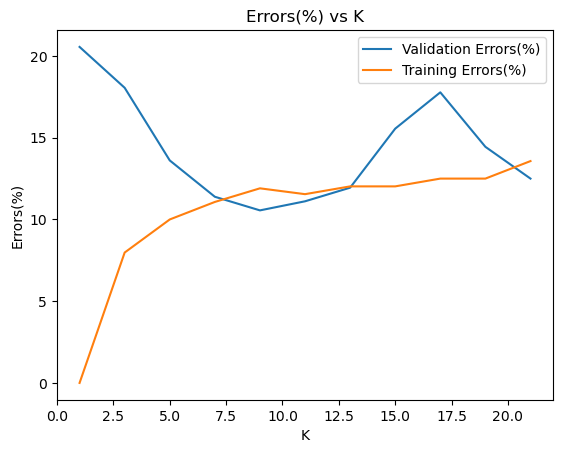

The best value of k is  9
The optimal value of K is 9
The best accuracy that we are getting with optimal k is: 0.8916666666666667


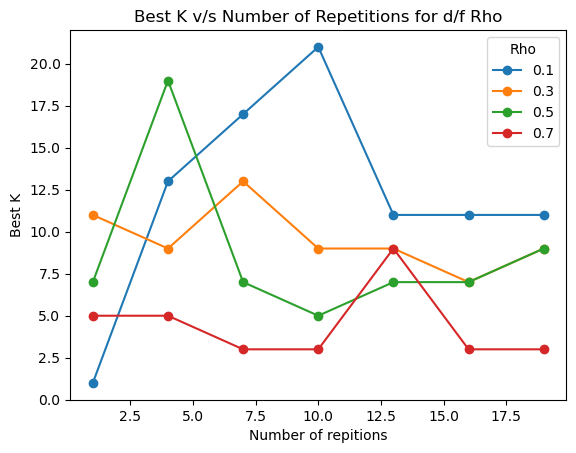

In [15]:
####################################
#Part(c): Parameter selection: What is good value for k?
####################################
#Write holdoutCVkNN() Function
def holdoutCVkNN(k_values,num_iter,rho,train_df = train_df,evaluate_train_err = True,distance_matrix="l2"):
  #Iterate through range of k values
    #Iterate through number of repetitions
      #Hold out rho fraction of training data in each repetition.
  rho = rho
  train_errors = []
  val_errors = []

  for k in k_values:
    train_error = 0
    val_error = 0
    for _ in range(num_iter):
      shuffled_df = train_df.sample(frac=1).reset_index(drop=True)
      val_size = int(rho * len(shuffled_df))
      t_val = shuffled_df.iloc[:val_size]
      t_train = shuffled_df.iloc[val_size:]
      if(distance_matrix == "l1"):
        knn = KNeighborsClassifier(n_neighbors=k,distance_metric="l1")
      else:
        knn = KNeighborsClassifier(n_neighbors=k,distance_metric="l2")
      train_pre = knn.fit(t_train[['x1','x2']].to_numpy(),t_train['y'].to_numpy())
      pred_train = knn.predict(t_train[['x1','x2']].to_numpy())
      pred_val = knn.predict(t_val[['x1','x2']].to_numpy())
      if(evaluate_train_err):
        train_error += np.mean(knn.predict(t_train[['x1','x2']].to_numpy()) != t_train['y'].to_numpy())
      val_error += np.mean(knn.predict(t_val[['x1','x2']].to_numpy()) != t_val['y'].to_numpy())
    train_errors.append(100 * (train_error / num_iter))
    val_errors.append(100*(val_error / num_iter))
  #Return errors on training and validation data
  if(evaluate_train_err):
    return val_errors,train_errors
  else: return val_errors

#Printing the Validation as well as Training errors for K Values 1,3,5,..... and 10 Repetitions with Rho=0.3
k_values=np.arange(1,23,2)
verr,terr=holdoutCVkNN(k_values,10,0.3)
print(verr)
print(terr)

#Plot training and validation errors for different values of k
plt.plot(k_values,verr,label="Validation Errors(%)")
plt.plot(k_values,terr,label="Training Errors(%)")
plt.title("Errors(%) vs K")
plt.xlabel("K")
plt.ylabel("Errors(%)")
plt.legend()
plt.show()

#what is the best value for k?
bestk = k_values[np.argmin(verr)]
print("The best value of k is ",bestk)

#Effect of rho on k
k_range = np.arange(1, 23, 2)
numarr = np.arange(1, 21, 3)
rhoarr = np.arange(0.1, 0.9, 0.2)
ansarr = []

for rho in rhoarr:
    numeff = []
    for numrep in numarr:
        verr, terr = holdoutCVkNN(k_range, numrep, rho)
        min_err = np.min(verr)
        min_idx = verr.index(min_err)
        numeff.append(k_range[min_idx])
    ansarr.append(numeff)

#Plotting the best value of K obtained for each rho
j=0
for i in ansarr:
  plt.plot(numarr,i,marker='o',label=int(rhoarr[j]*10)/10)
  j=j+1
plt.legend(title="Rho")
plt.title("Best K v/s Number of Repetitions for d/f Rho")
plt.xlabel("Number of repitions")
plt.ylabel("Best K")

knn = KNeighborsClassifier(n_neighbors=bestk)
knn.fit(train_df[['x1','x2']].to_numpy(),train_df['y'].to_numpy())
pred_train = knn.predict(test_df[['x1','x2']].to_numpy())
best_acc = np.mean(pred_train == test_df['y'].to_numpy())
print("The optimal value of K is "+str(bestk))
print("The best accuracy that we are getting with optimal k is: "+str(best_acc))

<h3>Q: How would you answer what is the best value of K?</h3>  
  <p>The best value of K is ideally one that minimizes both validation and training errors. However, in real-world scenarios, as K increases, training errors tend to increase while validation errors decrease. Thus, it's important to find a K that balances these factors, often determined by the minimum value of the weighted average of validation and training accuracy. In our case, more emphasis is placed on minimizing the validation errors.</p>  
  
  <h3>Q: How is the value of K affected by ρ (percentage of points held out) and number of repetitions? What does a large number of repetitions provide?</h3>

  <p>Increasing ρ decreases the training dataset size and increases the validation dataset size. The graph above shows how K varies with ρ for different numbers of repetitions. As the number of repetitions increases, we approach a stable value of the best K for each ρ. Notably, as ρ increases, there tends to be a slight decrease in the best K as it moves toward a stable value.</p>  
  
  <h3>Q: Apply the model obtained by cross-validation (i.e., best K) to the test set and check if there is an improvement on the classification error over the result of Part 2.</h3>  
  <p>Choosing the optimal value of K from the validation dataset leads to a decrease in classification error. The improved accuracy is reflected in the output above.</p>


[(9, 89.5), (7, 90.83333333333333), (9, 90.16666666666667)]


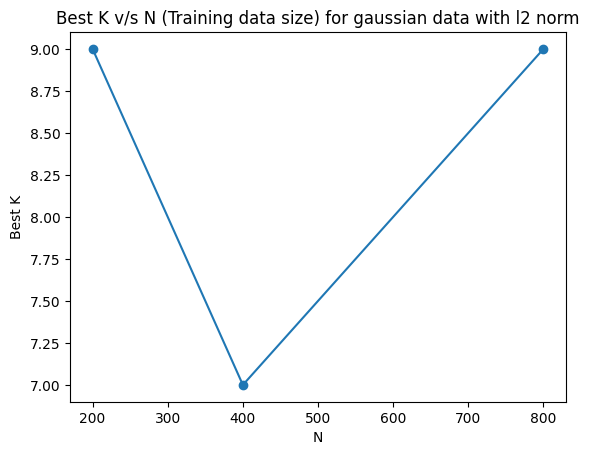

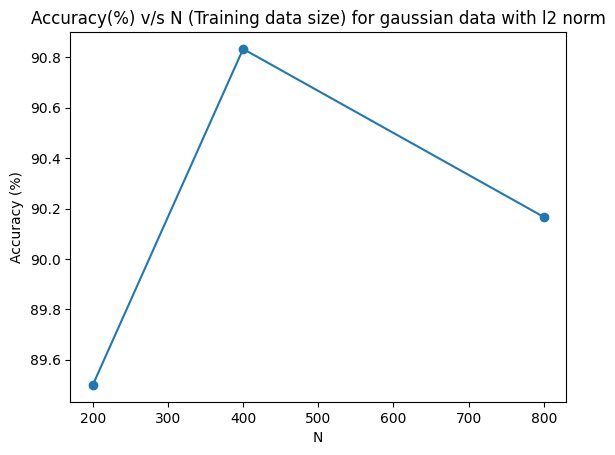

[(5, 99.0), (3, 98.41666666666667), (9, 99.16666666666667)]


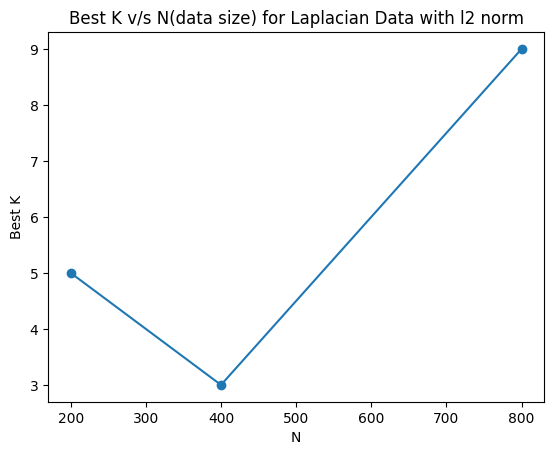

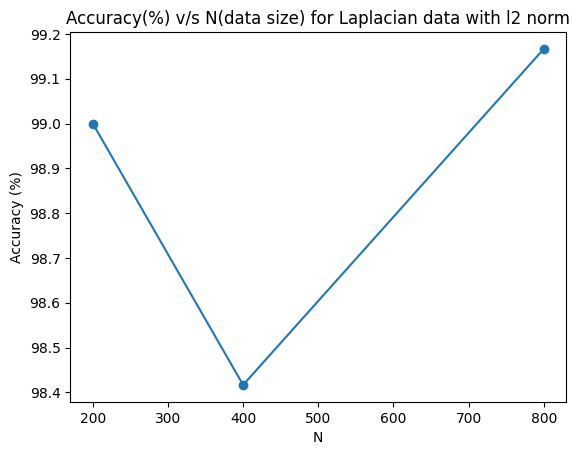

In [ ]:
##################################
#Part(d): Influence of training data on KNN classifier
##################################
#Performance evaluation as n increases
#Obtaining more datapoints from the Gaussian Distribution to improve the accuracy of the KNN classifier
cov_list=[[[0.1,0],[0,0.1]],[[0.3,0],[0,0.3]],[[0.5,0],[0,0.5]]]
n_list=[200,400,600,800] #Different values of the training data set size used

means = [mean1,mean2,mean3,mean4]
def findInfluence(cov_list=cov_list,n_list = n_list,k_range = k_range,means = means,laplacian = True,distance_matrix="l2"): 
  err = []
  for cov in cov_list:
    for n in n_list:
      # Sample data points from the bivariate Gaussian distribution
      X_train = []
      Y_train = []

      # Generate training and testing data
      for mean in means:
        if laplacian:
           #taking b as cov[0][0]
           train_x1_x2 = np.random.laplace(mean, cov[0][0], (n//4, 2))
        else:
          # gaussian data
          train_x1_x2 = np.random.multivariate_normal(mean, cov, n//4)


        X_train.extend(train_x1_x2)
        if mean[0] == mean[1]:  # Class 1
            Y_train.extend(np.ones(n//4))
        else:  # Class 2
            Y_train.extend(-np.ones(n//4))
      train_df = pd.DataFrame(X_train, columns=['x1', 'x2'])
      train_df['y'] = Y_train
      if(distance_matrix == "l1"): # changed dist_matrix to distance_matrix
        val_err = holdoutCVkNN(k_range,10,0.3,train_df,evaluate_train_err=False,distance_matrix="l1") # changed dist_matrix to distance_matrix
      else:
        val_err = holdoutCVkNN(k_range,10,0.3,train_df,evaluate_train_err=False,distance_matrix="l2") # changed dist_matrix to distance_matrix
      err.append(val_err)
  return err

#finding error without varying cov
gauss_err = findInfluence(laplacian=False)
err = gauss_err
best_param = []
for i in range(len(err)):
  bestK = k_range[np.argmin(err[i])]
  best_acc = 100 - np.min(err[i])
  best_param.append((bestK,best_acc))
print(best_param)

#Plotting the Best value of K for each training data size used
plt.plot(n_list,[best_param[i][0] for i in range(len(best_param))],marker="o") # Use len(n_list) in range function
plt.title("Best K v/s N (Training data size) for gaussian data with l2 norm")
plt.xlabel("N")
plt.ylabel("Best K")
plt.show()

#Plotting the Accuracy vs training data size
plt.plot(n_list,[best_param[i][1] for i in range(len(best_param))],marker = "o") # Use len(n_list) in range function
plt.title("Accuracy(%) v/s N (Training data size) for gaussian data with l2 norm")
plt.xlabel("N")
plt.ylabel("Accuracy (%)")
plt.show()

#Experiments with more difficult data set.
#This was done by bringing the datasets closer by increasing the covariance and varying it
#The accuracy corresponding to each variance is being printed as the output
laplacian_err = findInfluence([[[0.1,0],[0,0.1]]],laplacian=True)
err = laplacian_err
best_param = []
for i in range(len(err)):
  bestK = k_range[np.argmin(err[i])]
  best_acc = 100 - np.min(err[i])
  best_param.append((bestK,best_acc))
print(best_param)
#Plotting the Best value of K for each training data size used
plt.plot(n_list,[best_param[i][0] for i in range(len(best_param))],marker="o") # Use len(n_list) in range function
plt.title("Best K v/s N(data size) for Laplacian Data with l2 norm")
plt.xlabel("N")
plt.ylabel("Best K")
plt.show()

#Plotting the Accuracy vs training data size
plt.plot(n_list,[best_param[i][1] for i in range(len(best_param))],marker = "o") # Use len(n_list) in range function
plt.title("Accuracy(%) v/s N(data size) for Laplacian data with l2 norm")
plt.xlabel("N")
plt.ylabel("Accuracy (%)")
plt.show()

## Q: Evaluate the performance as the size of the training set grows, e.g., n = {200, 400, 600,...}. How would you choose a good range for k as n changes? What can you say about the stability of the solution? Check by repeating the validation multiple times.

- A: As N(training set) grows, generally the accuracy of the kNN Classifier model increases as there is more data available for the model to compare the new test point and assign it a label and make better predictions.
- A good range of k can be chosen by the thorough analysis of the errors that we get while predicting the labels of the Validation dataset. The Values of K which give minimal validation errors are considered to be optimal. We can run the tests multiple times to get a stable solution.No proper relation can be derived between n and best_k from the above graph. However it might be possible to get a relation if we compute for larger values of n.


[(11, 85.66666666666667), (19, 89.66666666666667), (5, 89.77777777777777), (11, 86.875)]


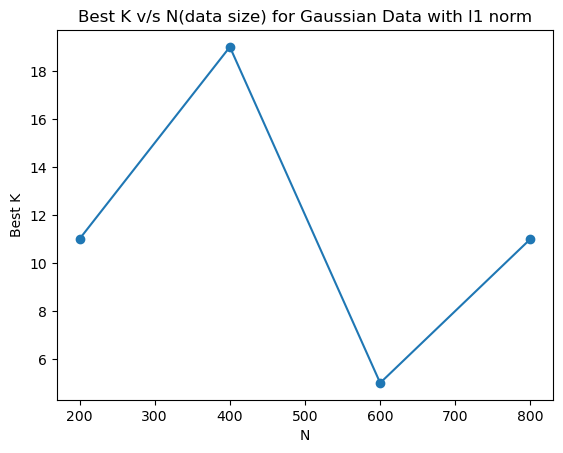

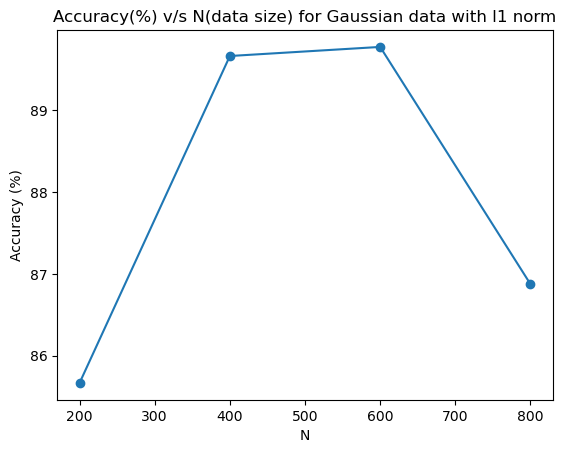

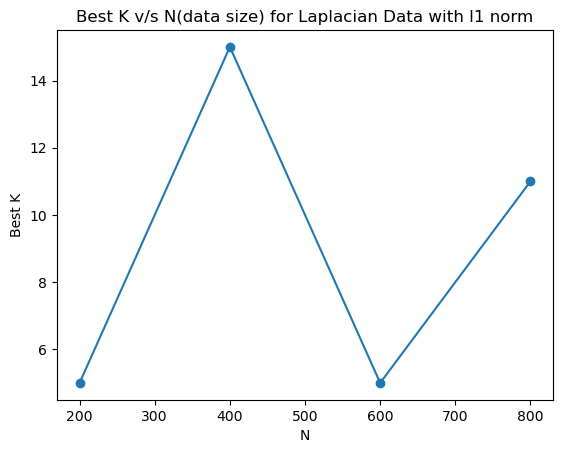

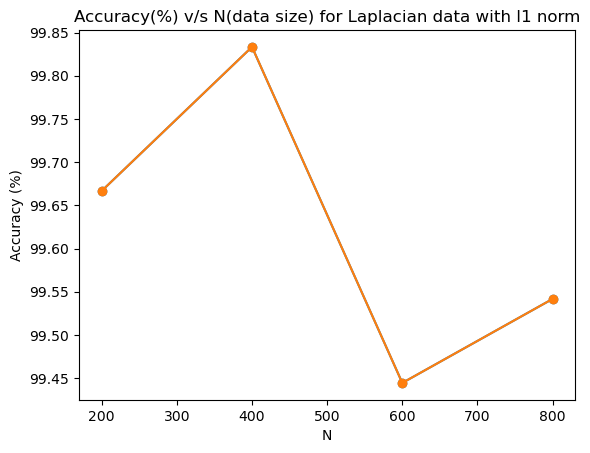

In [21]:
##################################
#Part(e): Influence of distance metric on KNN classifier
##################################
#Performance evaluation of KNN classifier with different distance metric
l1_gauss_err = findInfluence([[[0.1,0],[0,0.1]]],laplacian=False,distance_matrix="l1")
l1_laplacian_err = findInfluence([[[0.1,0],[0,0.1]]],laplacian=True,distance_matrix="l1")
err = l1_gauss_err
best_param = []
for i in range(len(err)):
  bestK = k_range[np.argmin(err[i])]
  best_acc = 100 - np.min(err[i])
  best_param.append((bestK,best_acc))
print(best_param)
#Plotting the Best value of K for each training data size used
plt.plot(n_list,[best_param[i][0] for i in range(len(best_param))],marker="o") # Use len(n_list) in range function
plt.title("Best K v/s N(data size) for Gaussian Data with l1 norm")
plt.xlabel("N")
plt.ylabel("Best K")
plt.show()

#Plotting the Accuracy vs training data size
plt.plot(n_list,[best_param[i][1] for i in range(len(best_param))],marker = "o") # Use len(n_list) in range function
plt.title("Accuracy(%) v/s N(data size) for Gaussian data with l1 norm")
plt.xlabel("N")
plt.ylabel("Accuracy (%)")
plt.show()

err = l1_laplacian_err
best_param = []
for i in range(len(err)):
  bestK = k_range[np.argmin(err[i])]
  best_acc = 100 - np.min(err[i])
  best_param.append((bestK,best_acc))
#Plotting the Best value of K for each training data size used
plt.plot(n_list,[best_param[i][0] for i in range(len(best_param))],marker="o") # Use len(n_list) in range function
plt.title("Best K v/s N(data size) for Laplacian Data with l1 norm")
plt.xlabel("N")
plt.ylabel("Best K")
plt.show()

#Plotting the Accuracy vs training data size
plt.plot(n_list,[best_param[i][1] for i in range(len(best_param))],marker = "o") # Use len(n_list) in range function
plt.plot(n_list,[best_param[i][1] for i in range(len(best_param))],marker = "o") # Use len(n_list) in range function
plt.title("Accuracy(%) v/s N(data size) for Laplacian data with l1 norm")
plt.xlabel("N")
plt.ylabel("Accuracy (%)")
plt.show()

<ipython-input-70-1595826b9ae7>:77: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


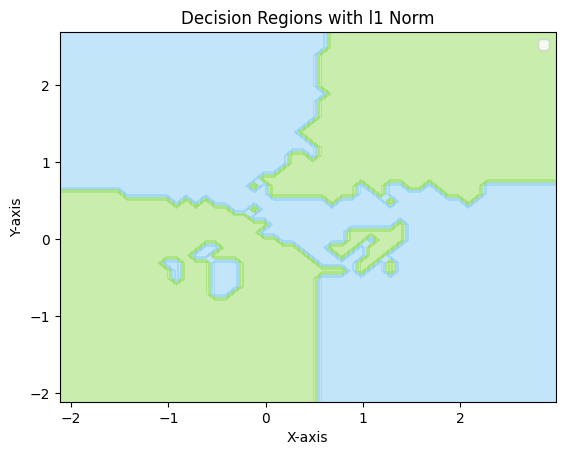

Number of misclassified points for l=1: 91


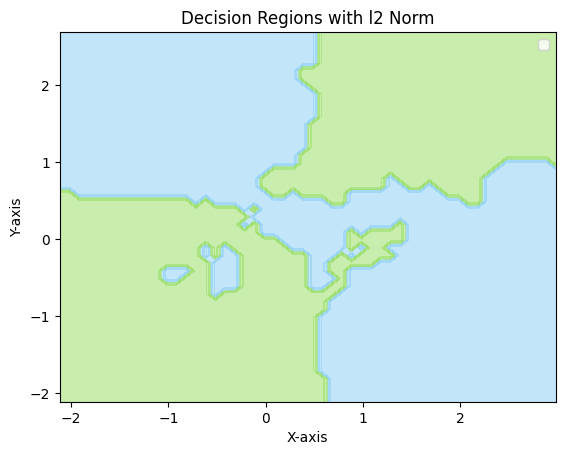

Number of misclassified points for l=2: 94


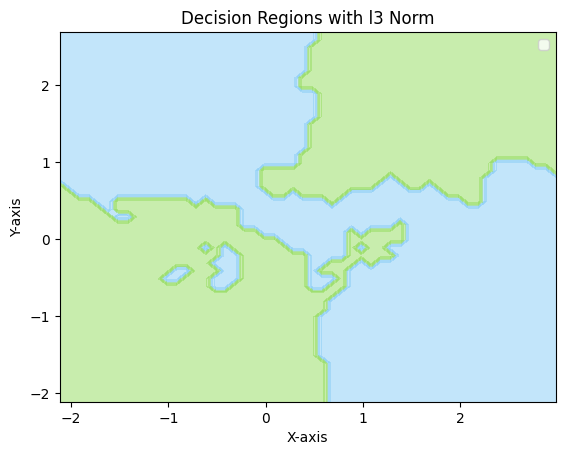

Number of misclassified points for l=3: 96


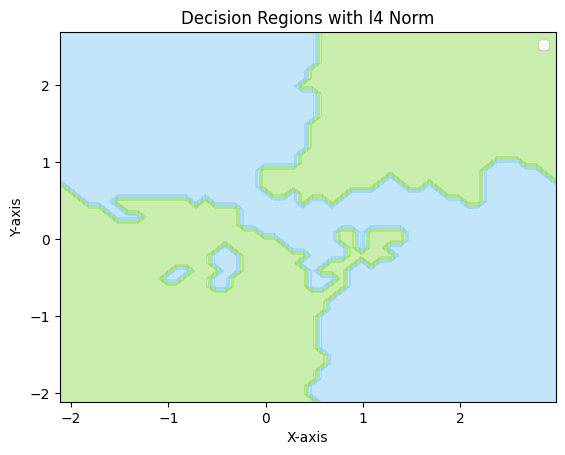

Number of misclassified points for l=4: 97


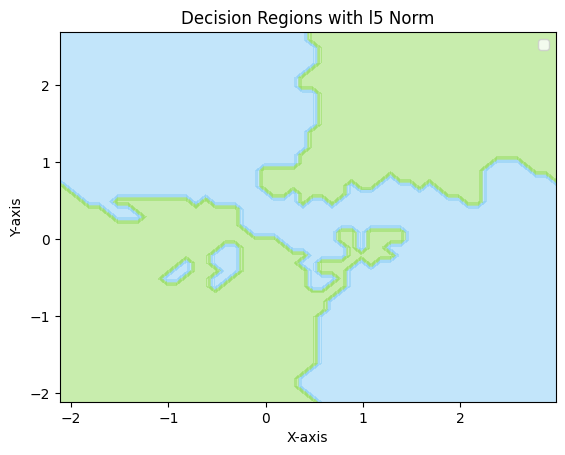

Number of misclassified points for l=5: 95


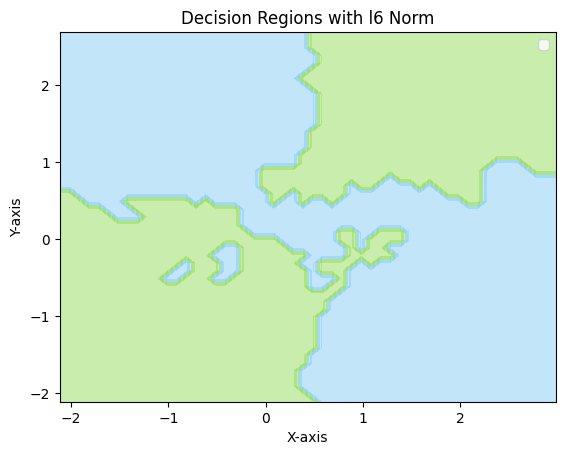

Number of misclassified points for l=6: 94


In [70]:
 ##################################
#Part(e): Influence of distance metric on KNN classifier
##################################

#Understand the decision regions of KNN classifier with different distance metric
#Generate and visualize the decision regions and overlay the test points
#Create a visual representation of predictions
# Define means and covariance

cov = [[0.4, 0], [0, 0.4]]

# Sample data points from Gaussian distributions
dis1 = np.random.multivariate_normal(mean1, cov, 90)
dis2 = np.random.multivariate_normal(mean2, cov, 90)
dis3 = np.random.multivariate_normal(mean3, cov, 90)
dis4 = np.random.multivariate_normal(mean4, cov, 90)

# Assign training and testing data
trainx = np.vstack((dis1[:30], dis4[:30], dis2[:30], dis3[:30]))
trainy = np.array([1] * 60 + [-1] * 60)

testx = np.vstack((dis1[30:], dis4[30:], dis2[30:], dis3[30:]))
testy = np.array([1] * 120 + [-1] * 120)

# Distance function
def distl(la, lb, l):
    """Computes the Minkowski distance (to the power l)."""
    return (abs(la[0] - lb[0]) ** l) + (abs(la[1] - lb[1]) ** l)

# KNN classification function
def kNNClassify_l(X_train, Y_train, X_test, k, l):
    """Classifies test points using k-NN with the given distance metric (l)."""
    predictions = []
    for test_point in X_test:
        distances = []
        for i in range(len(X_train)):
            distances.append([distl(X_train[i], test_point, l), Y_train[i]])
        distances.sort(key=lambda x: x[0])  # Sort based on distance
        k_nearest = [x[1] for x in distances[:k]]
        predicted_label = 1 if k_nearest.count(1) >= (k / 2) else -1
        predictions.append(predicted_label)
    return np.array(predictions)

# Visualization function
def visualize_decision_regions(X_train, Y_train, X_test, Y_test, k, l, title):
    """Visualizes decision regions using kNNClassify_l()."""
    class1, class2, misclassified = [], [], []

    Y_pred = kNNClassify_l(X_train, Y_train, X_test, k, l)

    for i in range(len(X_test)):
        if Y_pred[i] != Y_test[i]:
            misclassified.append(X_test[i])
        else:
            if Y_pred[i] == 1:
                class1.append(X_test[i])
            elif Y_pred[i] == -1:
                class2.append(X_test[i])

    class1, class2, misclassified = map(np.array, [class1, class2, misclassified])

    # Define meshgrid boundaries
    minX, maxX = X_test[:, 0].min() - 0.5, X_test[:, 0].max() + 0.5
    minY, maxY = X_test[:, 1].min() - 0.5, X_test[:, 1].max() + 0.5

    x1Grid, x2Grid = np.meshgrid(np.arange(minX, maxX, 0.1), np.arange(minY, maxY, 0.1))
    grid = np.c_[x1Grid.ravel(), x2Grid.ravel()]

    # Predict decision boundary
    ygrid = kNNClassify_l(X_train, Y_train, grid, k, l).reshape(x1Grid.shape)

    plt.contourf(x1Grid, x2Grid, ygrid, cmap=ListedColormap([ '#87CDF6','#93DC5C']),alpha=0.5)

    plt.title(title)
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.show()

    print(f"Number of misclassified points for l={l}: {len(misclassified)}")

# Visualizing for multiple distance metrics
templ = [1, 2, 3, 4, 5, 6]
for l in templ:
    visualize_decision_regions(trainx, trainy, testx, testy, k=5, l=l, title=f"Decision Regions with l{l} Norm")


1.  The shape of **decision regions** in KNN changes when we use different distance measures (L1, L2,L3 etc.).

- **L1 distance** creates more linear decision boundaries.
- **L2 distance** (Euclidean) produces smoother, curved typically results in smoother, more curved boundaries which are generally represented by quadratic lines and so on. Generally larger distance metrics are more sensitive to the scale that we use in representing the data points in the kNN model.
- Accuracies obtained by varying the values of distance metrics are plotted in the above graph
  The decision regions are plotted for different values of the distance metrics


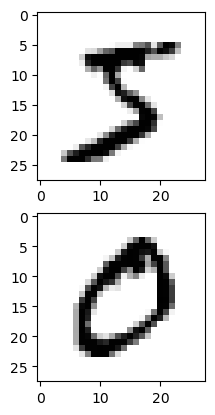

In [ ]:
##################################
#Part(f): MNIST Digit classification using KNN classifier
##################################
#Load MNIST data
mnist = fetch_openml('mnist_784')
images = mnist.data.to_numpy()
targets = mnist.target.to_numpy()
#Plot a few images
plt.subplot(211)
plt.imshow((images[0].reshape(28,28)), cmap=plt.cm.gray_r, interpolation='nearest')
plt.subplot(212)
plt.imshow(images[1].reshape(28,28), cmap=plt.cm.gray_r, interpolation='nearest')

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 18, 18, 18, 126, 136, 175, 26, 166, 255, 247, 127, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 30, 36, 94, 154, 170, 253, 253, 253, 253, 253, 225, 172, 253, 242, 195, 64, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 49, 238, 253, 253, 253, 253, 253, 253, 253, 253, 251, 93, 82, 82, 56, 39, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 18, 219, 253, 253, 253, 253, 253, 198, 182, 247, 241, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 80, 156, 107, 253, 253, 205, 11, 0, 43, 154, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 14, 1, 154, 253, 90, 0, 

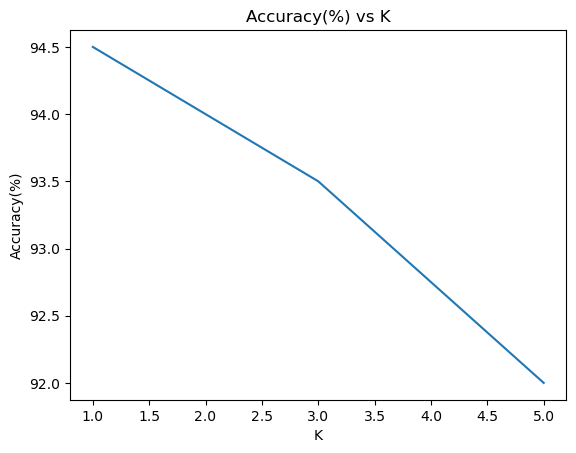

The Optimal value of K is: 1


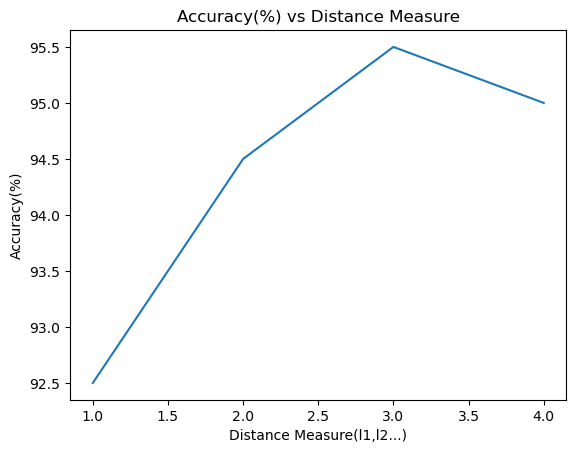

The Optimal value of distance measure: 3
Optimal Accuracy with best hyper parameters ( k, error_func ) obtained from cross validation: 89.0
The confusion matrix for the given testing data is: 
 [[18.  0.  0.  0.  0.  0.  1.  0.  0.  0.]
 [ 0. 18.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1. 18.  0.  0.  0.  0.  1.  1.  0.]
 [ 0.  0.  0. 16.  0.  2.  0.  0.  1.  1.]
 [ 0.  0.  0.  0. 17.  1.  0.  1.  0.  2.]
 [ 0.  0.  0.  0.  0. 20.  0.  0.  0.  1.]
 [ 0.  0.  0.  0.  0.  0. 24.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0. 20.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0. 10.  1.]
 [ 0.  1.  0.  0.  4.  0.  0.  1.  0. 17.]]
Alternate ways to improve performance:

1. Scaling the number of pixels in each image:
   - Increase image resolution from 28x28 to larger sizes for better predictions.
   - Note: This may be computationally expensive.

2. Dimensionality Reduction:
   - Use methods like Principal Component Analysis (PCA) to eliminate less useful information.

3. Increase the training data 

In [5]:
#Create train, validation and test splits

images=list(images[:2000])
targets=list(targets[:2000])
""""
The code here is being run by using 2000 images as the input and not 70000,bcz my PC is taking too long run the model
It can be changed according to the requirements by replacing 2000 by 70000
"""

#Converting all the images into lists each containg pixel values
images=list(images)
targets=list(targets)
for i in range(0,len(images)):
  images[i]=list(images[i])
for i in range(0,len(targets)):
  targets[i]=int(targets[i])
print(images[0],targets[0])

#Splitting the data into training and validation sets and testing data sets in 8:1:1 ratio
trainimg=images[:int(0.8*len(images))]
trainimgy=targets[:int(0.8*len(images))]
valimg=images[int(0.8*len(images)):int(0.9*len(images))]
valimgy=targets[int(0.8*len(images)):int(0.9*len(images))]
testimg=images[int(0.9*len(images)):]
testimgy=targets[int(0.9*len(images)):]
print(len(trainimg),len(valimg),len(testimg))

#'MultiClassKNNClassify' function
def rootmean_sqerr(pre,true):
  """
  Returns the root mean squared error caused by the difference in the predicted values and the actual class values
  """
  sum=0
  for i in range(len(pre)):
    sum+=(pre[i]-true[i])**2
  return np.sqrt(sum/len(pre))

def MultiClassdist(a,b,l):
  """
  Input: Data points a,b
  Output: Returns the square of the distance metric l
  """
  sum=0
  for i in range(len(a)):
    sum+=(abs(a[i]-b[i])**l)
  return sum
def MultiClassKNNClassify(X_train,Y_train,X_test,k,l):
  """
  Input: Training data and class values and Testing data,Parameters k and distance metric l
  Output: Returns the class labels for all the testing data
  """
  answer=[]
  o=0
  for b in X_test:
    d_list=[]
    for i in range(len(X_train)):
      d_list.append([MultiClassdist(X_train[i],b,l),Y_train[i]])
    d_list=sorted(d_list)
    map=[0,0,0,0,0,0,0,0,0,0]
    for i in range(0,k):
      map[d_list[i][1]]+=1
    answer.append(map.index(max(map)))
  return answer

def MultiClassKNNAccuracy(true,pred):
  """
  Returns the accuracy of the values predicted by the MultiClassKNNClassifier
  """
  count=0
  for i in range(len(true)):
    if(true[i]==pred[i]):
      count=count+1
  return (count/len(true))*100.0

pre=MultiClassKNNClassify(trainimg,trainimgy,testimg,3,2)
print(MultiClassKNNAccuracy(pre,testimgy))

#Empirically chose most suitable k and error function based on the evauation on cross-validation data
#Evaluate the performance using different values of 'k' on the validation data and select the optimal 'k' for the test data.
#Evaluation the performance using different distance measures (l1,l2, etc) on the validation data and select the optimal distance measure for test data.

#Plotting the Accuracy obtained for different values of K
k_accuracy=[]
k_range=list(np.arange(1,7,2))
for k in k_range:
  pre=MultiClassKNNClassify(trainimg,trainimgy,valimg,k,2)
  h=MultiClassKNNAccuracy(pre,valimgy)
  k_accuracy.append([h,k])
plt.plot([item[1] for item in k_accuracy],[item[0] for item in k_accuracy])
plt.title("Accuracy(%) vs K")
plt.ylabel("Accuracy(%)")
plt.xlabel("K")
plt.show()
k_accuracy=sorted(k_accuracy)

#Finding and printing the optimal values of K and l for maximum accuracy
optimal_k=k_accuracy[-1][1]
print(f"The Optimal value of K is: {optimal_k}")

l_range=[1,2,3,4]
l_accuracy=[]
for l in l_range:
  pre=MultiClassKNNClassify(trainimg,trainimgy,valimg,optimal_k,l)
  h=MultiClassKNNAccuracy(pre,valimgy)
  l_accuracy.append([h,l])
plt.plot([item[1] for item in l_accuracy],[item[0] for item in l_accuracy])
plt.title("Accuracy(%) vs Distance Measure")
plt.ylabel("Accuracy(%)")
plt.xlabel("Distance Measure(l1,l2...)")
plt.show()
l_accuracy=sorted(l_accuracy)

optimal_l=l_accuracy[-1][1]
print(f"The Optimal value of distance measure: {optimal_l}")

#Evaluate the performance on test data with the best hyper parameters ( k, error_func ) obtained from cross validation

pre=MultiClassKNNClassify(trainimg,trainimgy,testimg,optimal_k,optimal_l)
optimal_acc=MultiClassKNNAccuracy(pre,testimgy)
print(f"Optimal Accuracy with best hyper parameters ( k, error_func ) obtained from cross validation: {optimal_acc}")

#Create a confusion matrix for test data
def compute_confusion_matrix(true, pred):
    '''
    Inputs: Ground truth labels and classifier predictions
    Outputs: Confusion matrix
    '''
    x = np.zeros((10, 10))
    for i in range(0,len(true)):
      x[true[i]][pred[i]]+=1
    return x

print("The confusion matrix for the given testing data is: \n",compute_confusion_matrix(testimgy, pre))


#Suggest an alternative ways to improve performance
def print_improvement_strategies():  
    print("Alternate ways to improve performance:\n")  
    
    print("1. Scaling the number of pixels in each image:")  
    print("   - Increase image resolution from 28x28 to larger sizes for better predictions.")  
    print("   - Note: This may be computationally expensive.\n")  

    print("2. Dimensionality Reduction:")  
    print("   - Use methods like Principal Component Analysis (PCA) to eliminate less useful information.\n")  

    print("3. Increase the training data size:")  
    print("   - More images can improve model accuracy in predictions.\n")  

    print("4. Assign different weights to pixels:")  
    print("   - Prioritize pixels by assigning weights based on their importance.\n")  

# Call the function to print the strategies  
print_improvement_strategies()